In [1]:
%load_ext autoreload
%autoreload 2

import torch
from instanseg.utils.create_bioimageio_model import export_bioimageio
from instanseg.utils.utils import show_images

import os
os.environ["INSTANSEG_MODEL_PATH"] = str(os.path.abspath("../instanseg/models/"))
os.environ["INSTANSEG_TORCHSCRIPT_PATH"] = str(os.path.abspath("../instanseg/torchscripts/"))
os.environ["INSTANSEG_BIOIMAGEIO_PATH"] = str(os.path.abspath("../instanseg/bioimageio_models/"))

site.config.json: 6.57kiB [00:00, 16.9MiB/s]                  
/home/cdt/micromamba/envs/instanseg/lib/python3.9/site-packages/bioimageio/spec/shared/_resolve_source.py:482: UserWarning: Download (6568) does not have expected size (2289).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")
collection.json: 235kiB [00:00, 26.4MiB/s]                   
/home/cdt/micromamba/envs/instanseg/lib/python3.9/site-packages/bioimageio/spec/shared/_resolve_source.py:482: UserWarning: Download (234788) does not have expected size (28539).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")
/home/cdt/micromamba/envs/instanseg/lib/python3.9/site-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


No best_params.csv found in model folder, using default parameters
Generating InstanSeg_UNet


/home/cdt/Documents/Projects/InstanSeg/instanseg_thibaut/instanseg/utils/pytorch_utils.py:67: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /opt/conda/conda-bld/pytorch_1699449200967/work/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  intersection = torch.sparse.mm(sparse_onehot, sparse_onehot.T).to_dense()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


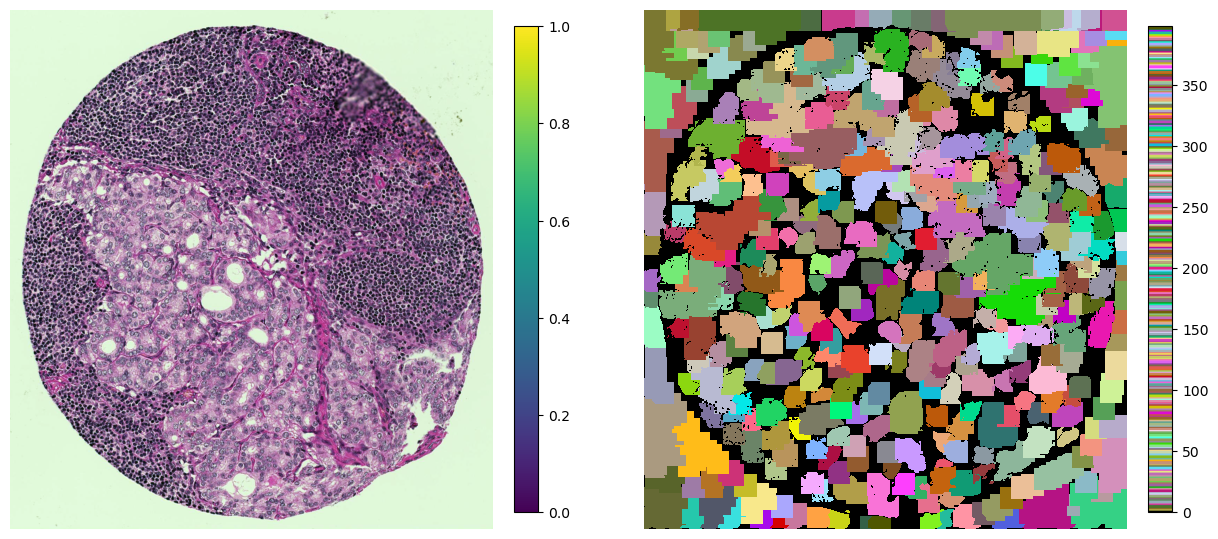

/home/cdt/micromamba/envs/instanseg/lib/python3.9/site-packages/torch/jit/_script.py:1277: UserWarning: `optimize` is deprecated and has no effect. Use `with torch.jit.optimized_execution() instead
  warnings.warn(


UnsupportedNodeError: import statements aren't supported:
  File "/home/cdt/Documents/Projects/InstanSeg/instanseg_thibaut/instanseg/utils/loss/instanseg_loss.py", line 346


    from kornia.augmentation import RandomRotation3D
    ~~~~ <--- HERE
    
        
'generate_coordinate_map' is being compiled since it was called from 'InstanSeg_Torchscript.forward'
  File "/home/cdt/Documents/Projects/InstanSeg/instanseg_thibaut/instanseg/utils/loss/instanseg_loss.py", line 1337
                    height, width = x.size(1), x.size(2)
    
                    xxyy = generate_coordinate_map(mode = "linear", spatial_dim = self.dim_coords, height = height, width = width, device = x.device)
                    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ <--- HERE
    
    


In [2]:
from instanseg.utils.utils import export_to_torchscript

model_name = "HPA"

export_to_torchscript(model_name, show_example=True)

instanseg = torch.jit.load("../instanseg/torchscripts/"+ model_name + ".pt")

export_bioimageio(instanseg, 
                model_name = model_name,
                test_img_path = "../instanseg/examples/HE_example.tif",
            )

